Randomly-colliding particles (2D)
===

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [9]:
#Time range and small step :
t0 = 0
tf = 1
t = np.linspace(t0, tf, 5000)
tsize = np.size(t)

#Length of the 2D square :
L = 100

### Initialisation

In [11]:
#Maximum particle size :
max_size = int(input("Enter the maximum particle size possible = "))

#Initial array of the concentration of population :
n = np.zeros((tsize, max_size))
nb_particles = 0

for i in range(0, max_size):
    n[0, i] = int(input("Enter the initial condition of n_%d = " %(i+1)))
    nb_particles = int(nb_particles + n[0, i])

print("Number of particles = ", nb_particles)
#print(n)

Enter the maximum particle size possible =  2
Enter the initial condition of n_1 =  100
Enter the initial condition of n_2 =  0


Number of particles =  100


In [12]:
    
sum_x = 0
sum_y = 0

for _ in (1,100) :   
    
    #Initial positions of nb_particles in the square of length L (without 2 particles at the same position) :
    x_rand_positions = np.random.choice(L, nb_particles)
    y_rand_positions = np.random.choice(L, nb_particles)
    
    sum_x = x_rand_positions + sum_x
    sum_y = y_rand_positions + sum_y 

print(sum_x)
    
    #3D array of size + position for each particle : ps = [[size r_i, x_i, y_i], ...] :
ps = np.empty([0,3])
#sum_ps = np.empty([0,3])
    #Add the right number of particles of size r according to the initial conditions given above :
for i in range(max_size) :
    ps = np.concatenate( (ps, (i+1)*np.ones([ int(n[0,i]) , 3])) )
    
    #Add the random positions x and y on the array
for i in range(nb_particles) :
    ps[i, 1] = x_rand_positions[i]
    ps[i, 2] = y_rand_positions[i]
    

print(ps)


[ 42 132  92  48 107 111 140 163  38  26  62  19  94  76 162  52 109 130
  78  72 108 117  77 149  92 149  57  90  82 121 159 131  64 116 113 111
  37  81 112 116 138  94 123  48  65 115 153 110 160 103 141 100 101  21
 129  78 138  60 137 130  50  91  80  39  51  48  21  89  53  38 100  56
 140 111 178  87  62 107 104 103  55  25 136  56  80 127 189 111  70  71
  99  88 136  41  82 105  73  83  70  55]
[[ 1. 21. 77.]
 [ 1. 34. 18.]
 [ 1. 82. 81.]
 [ 1. 42. 26.]
 [ 1. 11. 86.]
 [ 1. 65. 90.]
 [ 1. 97. 52.]
 [ 1. 92. 82.]
 [ 1. 35. 50.]
 [ 1. 21. 37.]
 [ 1. 61. 35.]
 [ 1. 12. 27.]
 [ 1. 28. 61.]
 [ 1. 15. 74.]
 [ 1. 64. 48.]
 [ 1. 45. 43.]
 [ 1. 97. 69.]
 [ 1. 84. 75.]
 [ 1. 10. 17.]
 [ 1. 11. 88.]
 [ 1. 46. 94.]
 [ 1. 55. 26.]
 [ 1. 16. 25.]
 [ 1. 97. 86.]
 [ 1. 58. 30.]
 [ 1. 86.  6.]
 [ 1.  2. 11.]
 [ 1. 42. 36.]
 [ 1. 22. 12.]
 [ 1. 47. 85.]
 [ 1. 78.  2.]
 [ 1. 99. 83.]
 [ 1. 16.  0.]
 [ 1. 42. 97.]
 [ 1. 70. 36.]
 [ 1. 42.  1.]
 [ 1. 22. 66.]
 [ 1. 63. 52.]
 [ 1. 14. 11.]
 [ 1. 22

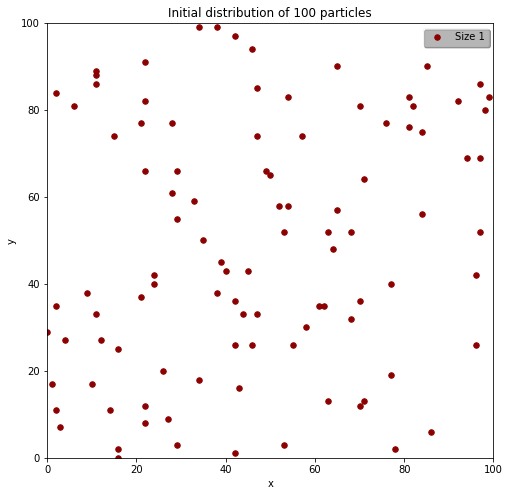

In [13]:
#To keep the initial array in memory :
ps_initial = ps

#Color array (for particles of different sizes) :
c = ["darkred", "blue", "orange", "green", "purple"]

#Illustration of the initial distribution of particles in the square :
plt.figure(figsize=(8,8))
plt.xlim(0,L)
plt.ylim(0,L)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Initial distribution of %d particles" %(nb_particles))

for r in range(1, max_size+1) :
    count=0
    for i in range(nb_particles) :
        if ps_initial[i, 0] == r :
            
            #to have a legend for only ONE point of each size we use a variable count (it prints the legend only for count=1)
            count = count+1
            if count==1 :
                plt.scatter(ps_initial[i, 1], ps_initial[i, 2], s=30*r, color=c[r-1], label="Size %d"%(r))
            else :
                plt.scatter(ps_initial[i, 1], ps_initial[i, 2], s=30*r, color=c[r-1])

plt.legend(loc="best", shadow="True", framealpha=0.2)
plt.show()

In [14]:
#For every time t :
for t_i in range(1, tsize) : 
    
    #Random moves of vertical or horizontal steps = +/- 1 for each particle :
    for i in range(np.shape(ps)[0]) :
        axis = random.randint(1, 2) #x or y
        direction = random.randint(1, 2) #right or left ( for x) / up or down ( for y)
        if axis== 1: #x
            if direction==1: #right
                ps[i, 1] += 1
            elif direction==2: #left
                ps[i, 1] -= 1
        elif axis==2 : #y
            if direction==1: #up
                ps[i, 2] += 1
            elif direction==2: #down
                ps[i, 2] -= 1
                
    #Initialisation of concentrations for each size r :
    #If there are no collisions at t_i, they will stay as they were at t_i-1
    for r in range(max_size) :
        n[t_i, r] = n[ t_i-1, r]

    #Collisions and evolution of concentrations :
    for i in range( np.shape(ps)[0] ) :
        for j in range( i+1, np.shape(ps)[0]-1 ) :
            
            if abs(ps[i, 1] - ps[j, 1]) < 1 and abs(ps[i, 2] - ps[j, 2]) < 1 :  
            # distance between 2 particles smaller than spatial step in axis x and y
                
                if ps[i, 0] + ps[j, 0] <= max_size : # AND collision allowed by the maximum particle size
                    
                    #Loss in concentration from particle i and j which are colliding :
                    #EXAMPLE : if particle i is size s_i=1, ps[i,0]=1 so its corresponding concentration is n[t,0]=n[t, ps[i,0-1] ]
                    n[ t_i, int(ps[i,0]-1) ] -= 1 
                    n[ t_i, int(ps[j,0]-1) ] -= 1 
                    
                    #the size of the new particle created by the collision increases ;
                    #we stock this new particle in the index i
                    ps[i, 0] = ps[i, 0] + ps[j, 0]
                    
                    #Gain in concentration of size s_i+s_j = ps[i,0] according to the eq above :
                    n[ t_i, int(ps[i, 0]-1) ] += 1
                    
                    #The particle j is removed from the array :
                    ps = np.delete(ps, j, 0)

NameError: name 'random' is not defined

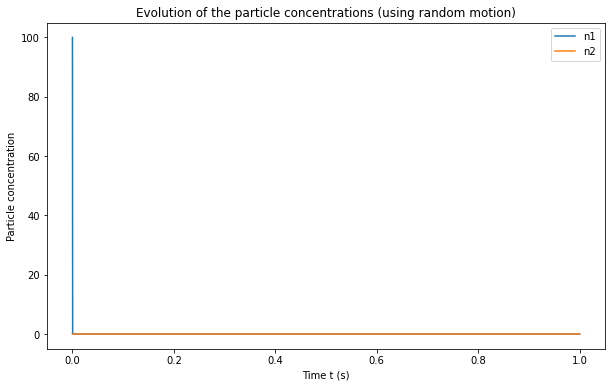

In [15]:
#Plot of the evolution of the concentrations :
plt.figure(figsize=(10,6))
plt.title("Evolution of the particle concentrations (using random motion)")
plt.xlabel("Time t (s)")
plt.ylabel("Particle concentration")
for r in range(max_size) :
    plt.plot(t, n[:, r], label="n%d"%(r+1))
plt.legend()
plt.show()

### Conservation of the total mass

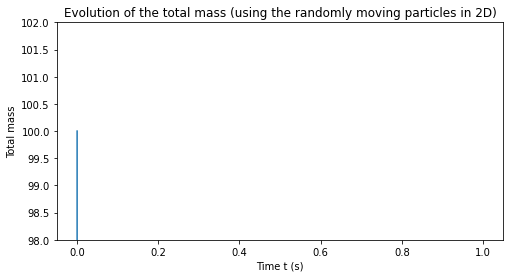

In [16]:
#Total mass :
def M(n) :
    sum=0
    for r in range(max_size) :
        sum = sum + (r+1)*n[:, r]
    return sum

plt.figure(figsize=(8,4))
plt.title("Evolution of the total mass (using the randomly moving particles in 2D)")
plt.xlabel("Time t (s)")
plt.ylabel("Total mass")
plt.ylim(98,102)
plt.plot(t, M(n))
plt.show()

### Illustration

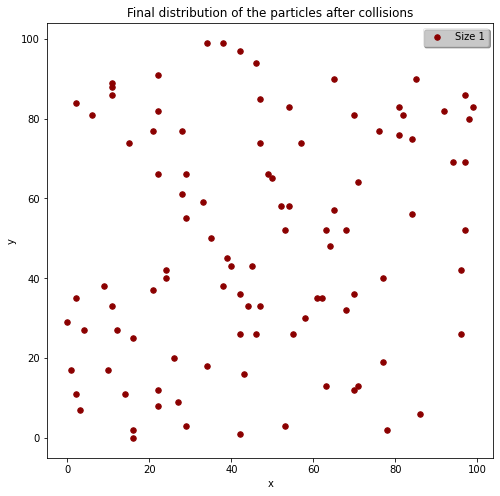

In [17]:
#Final distribution of particles in the square :
plt.figure(figsize=(8,8))
#plt.xlim(0,L)
#plt.ylim(0,L)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Final distribution of the particles after collisions")
for r in range(1, max_size+1) :
    count=0
    for i in range(np.shape(ps)[0]) :
        if ps[i, 0] == r :
            count = count+1
            if count==1 :
                plt.scatter(ps[i, 1], ps[i, 2], s=30*r, color=c[r-1], label="Size %d"%(r))
            else :
                plt.scatter(ps[i, 1], ps[i, 2], s=30*r, color=c[r-1])
plt.legend(loc="best", shadow="True", framealpha=0.4)
plt.show()

In [18]:
sum_x = 0
sum_y = 0
an_sum_x = 0
for j in (1,100) :   
    
    #Initial positions of nb_particles in the square of length L (without 2 particles at the same position) :
    x_rand_positions[j] = np.random.choice(L, nb_particles)
    y_rand_positions[j] = np.random.choice(L, nb_particles)
    
    sum_x = x_rand_positions[j] + sum_x
    sum_y = y_rand_positions[j] + sum_y 

print(sum_x)

ValueError: setting an array element with a sequence.